In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [7]:
train[train.groupby("education")]

TypeError: unhashable type: 'DataFrame'

In [5]:
print(test.isnull().sum())

print("****/////////////////////*******")

print(train.isnull().sum())

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64
****/////////////////////*******
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


In [6]:
train["education"] = train["education"].fillna("Bachelor's") #count of Bachelor's is more, so replaced with nulls
train["previous_year_rating"] = train["previous_year_rating"].fillna(3.0) #median

test["education"] = test["education"].fillna("Bachelor's")
test["previous_year_rating"] = test["previous_year_rating"].fillna(3.0) #median

In [7]:
train.corr().head() #to check correlation

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670


In [8]:
print(train.dtypes)
print("//******************************//")
print(test.dtypes)

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object
//******************************//
employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object


In [9]:
#I havent touched EDA part bcs i dont want to run it again.

# EDA

<AxesSubplot:>

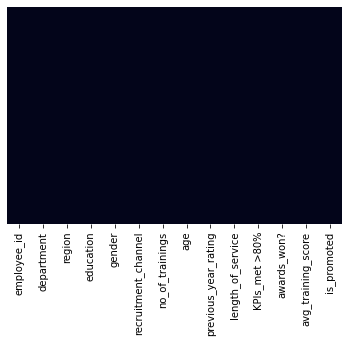

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

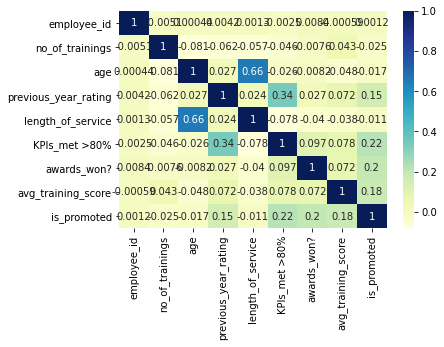

In [13]:
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

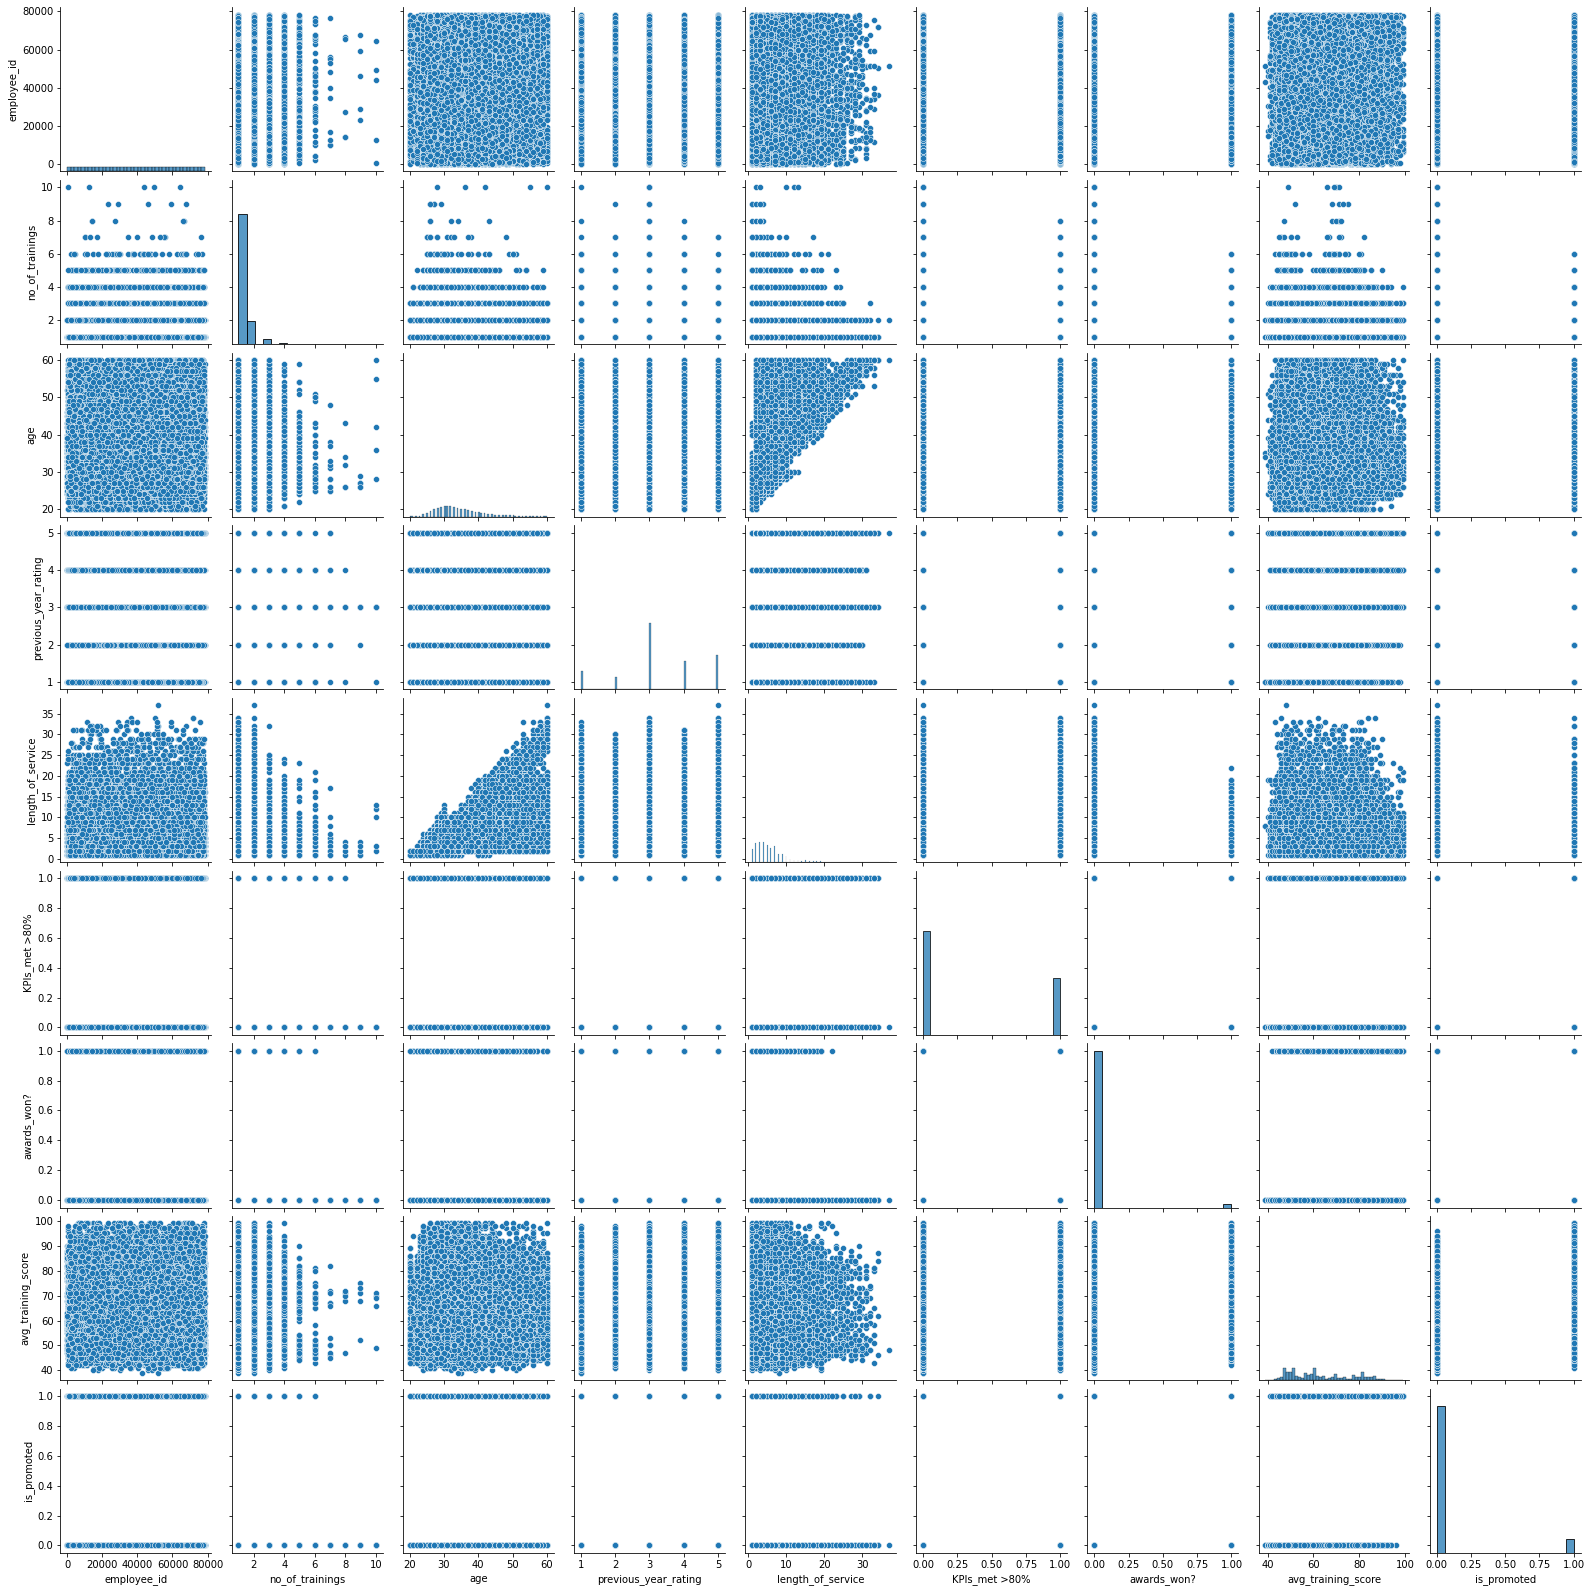

In [110]:
sns.pairplot(train)

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

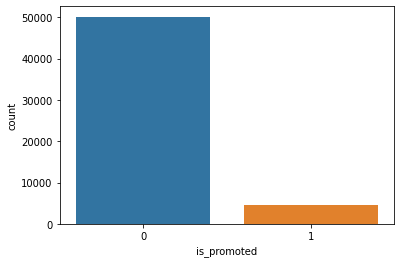

In [111]:
sns.countplot(x="is_promoted",data=train)

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

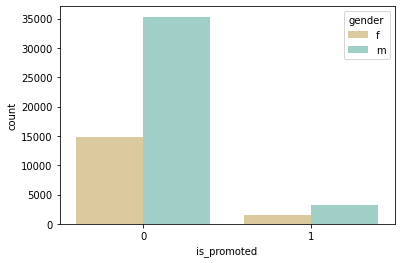

In [112]:
sns.countplot(x="is_promoted",hue="gender",data=train,palette="BrBG") #or RdBu_r

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

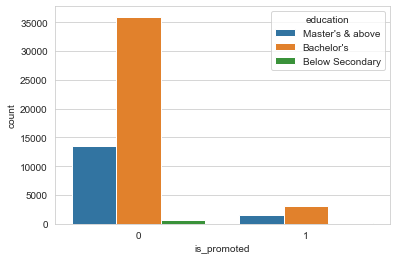

In [113]:
sns.set_style("whitegrid")
sns.countplot(x="is_promoted",hue="education",data=train) 

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

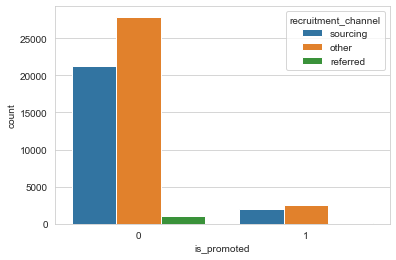

In [114]:
sns.countplot(x="is_promoted",hue="recruitment_channel",data=train) 

<AxesSubplot:xlabel='age', ylabel='department'>

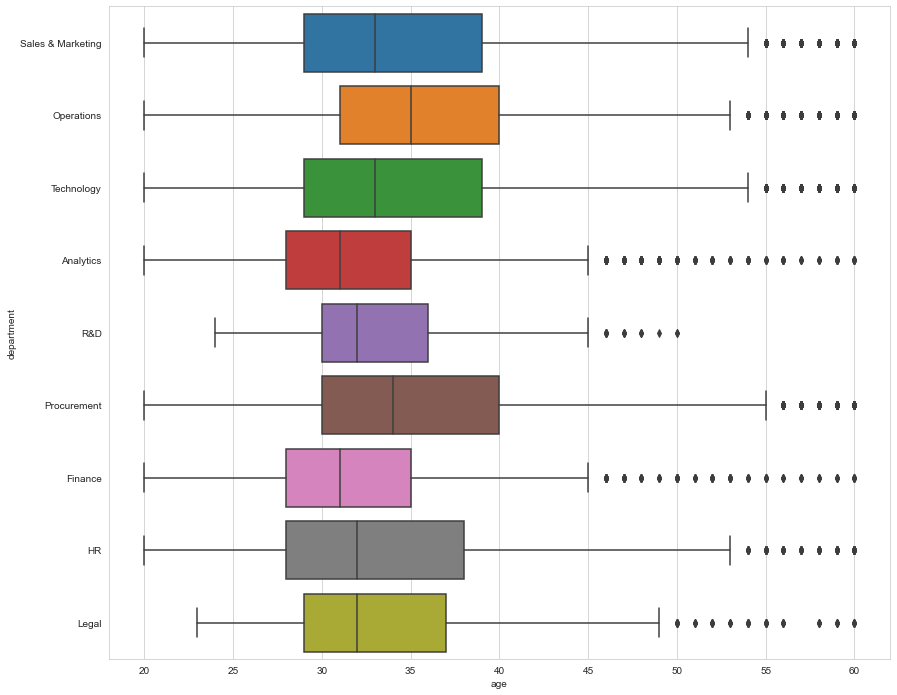

In [115]:
plt.figure(figsize=(14,12))
sns.boxplot(x="age",y="department",data=train)

<AxesSubplot:xlabel='region', ylabel='count'>

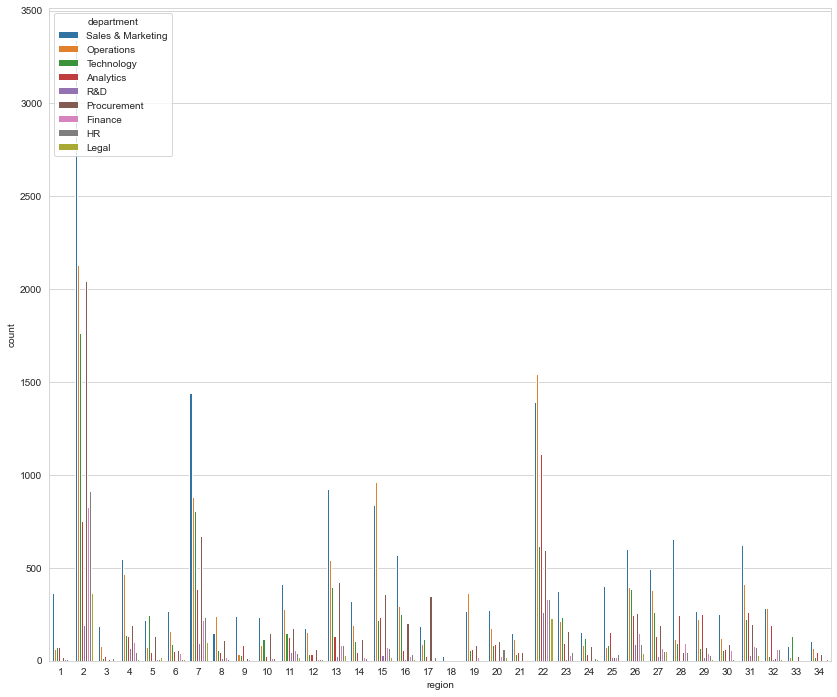

In [117]:
train["region"]=train["region"].astype(int)
plt.figure(figsize=(14,12))
sns.countplot(x="region",hue="department",data=train)

<AxesSubplot:xlabel='previous_year_rating', ylabel='length_of_service'>

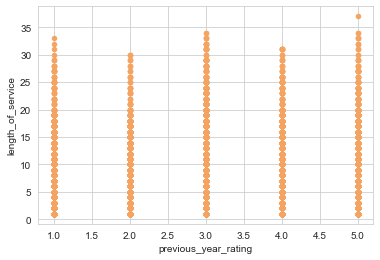

In [118]:
train.plot.scatter(x="previous_year_rating",y="length_of_service",color="sandybrown")

<AxesSubplot:xlabel='length_of_service', ylabel='education'>

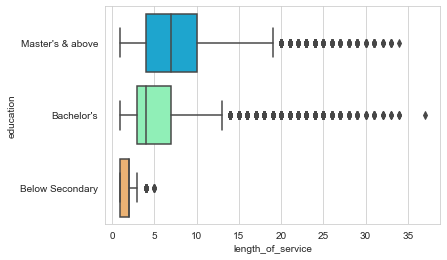

In [119]:
sns.boxplot(x="length_of_service",y="education",data=train,palette="rainbow") #or RdBu_r

<AxesSubplot:xlabel='region', ylabel='count'>

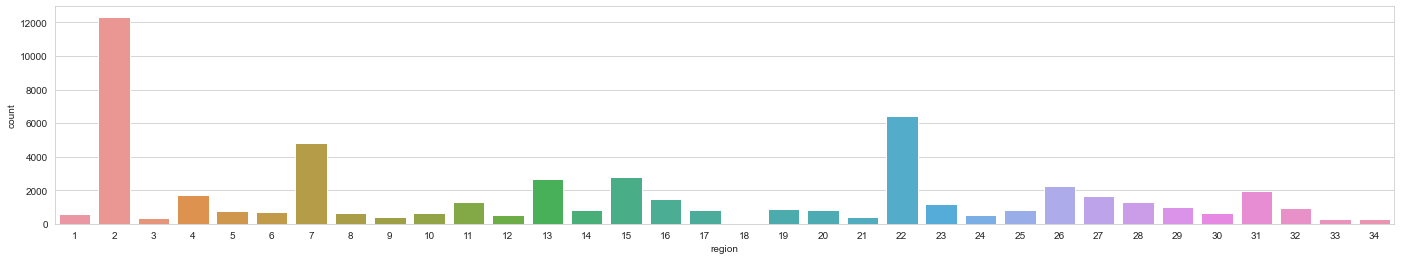

In [120]:
plt.figure(figsize=(24,4))
sns.countplot(train['region'])

<AxesSubplot:xlabel='no_of_trainings', ylabel='is_promoted'>

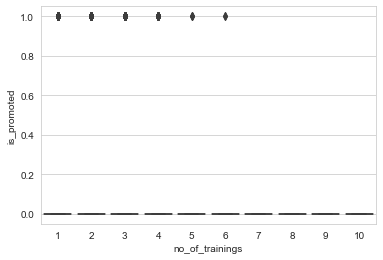

In [121]:
sns.boxplot('no_of_trainings',"is_promoted",data=train)

<AxesSubplot:>

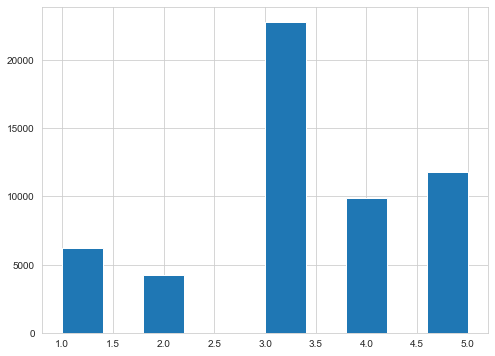

In [127]:
train['previous_year_rating'].hist(figsize=[8,6])

<AxesSubplot:xlabel='previous_year_rating', ylabel='Density'>

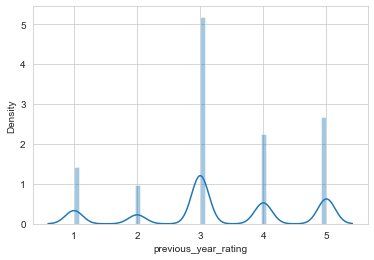

In [128]:
sns.distplot(train['previous_year_rating'])

<AxesSubplot:xlabel='previous_year_rating'>

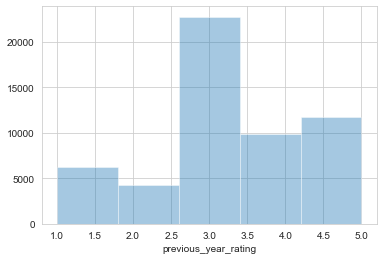

In [130]:
sns.distplot(train['previous_year_rating'],kde=False,bins=5)

<AxesSubplot:xlabel='previous_year_rating'>

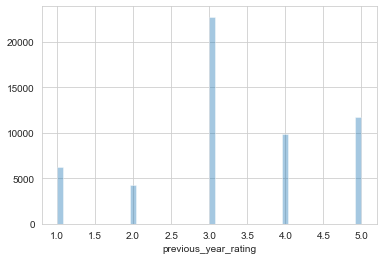

In [137]:
sns.distplot(train['previous_year_rating'],kde=False)

<AxesSubplot:>

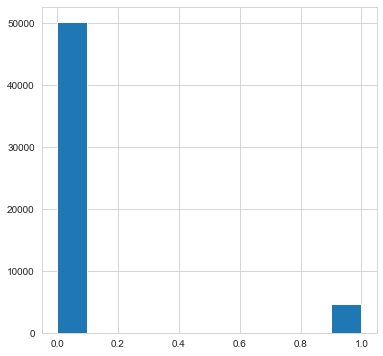

In [138]:
train['is_promoted'].hist(figsize=[6,6])

<AxesSubplot:xlabel='is_promoted', ylabel='Density'>

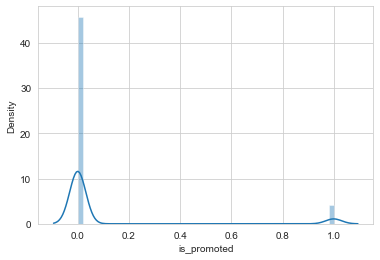

In [139]:
sns.distplot(train['is_promoted'])

<AxesSubplot:xlabel='is_promoted'>

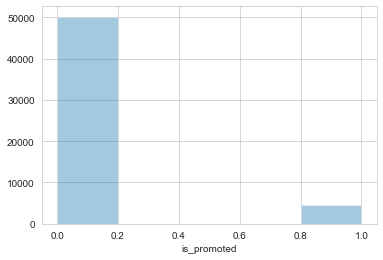

In [140]:
sns.distplot(train['is_promoted'],kde=False,bins=5)

<AxesSubplot:xlabel='is_promoted'>

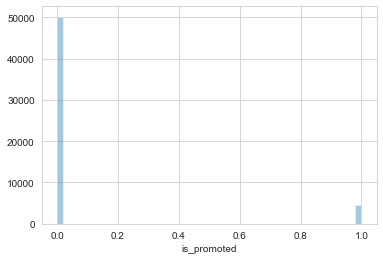

In [141]:
sns.distplot(train['is_promoted'],kde=False)

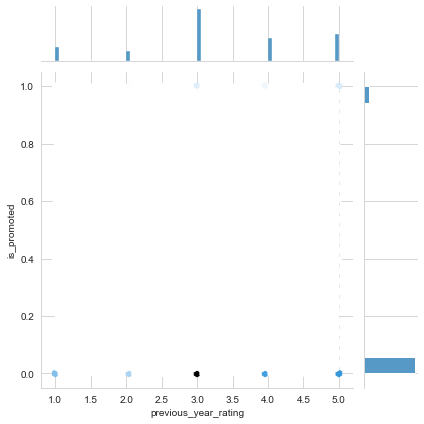

In [170]:
sns.jointplot(x='previous_year_rating',y='is_promoted',data=train,kind='hex')

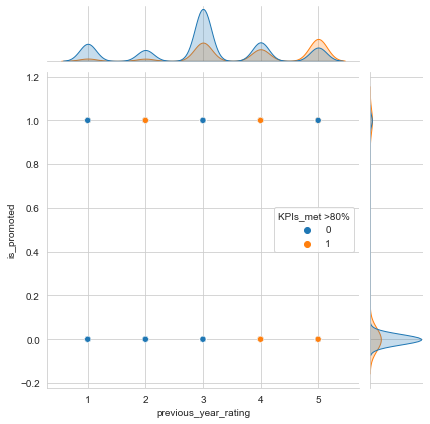

In [172]:
sns.jointplot(x='previous_year_rating',y='is_promoted',data=train,hue="KPIs_met >80%")

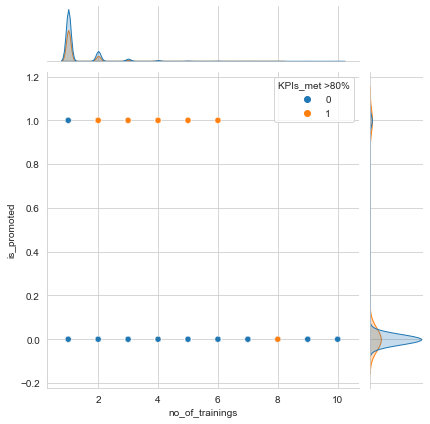

In [174]:
sns.jointplot(x='no_of_trainings',y='is_promoted',data=train,hue="KPIs_met >80%")

<AxesSubplot:xlabel='no_of_trainings', ylabel='Density'>

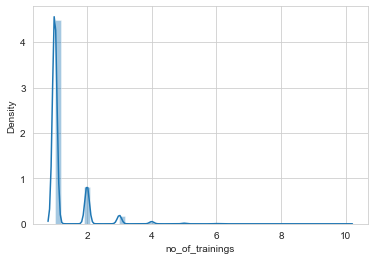

In [175]:
sns.distplot(train['no_of_trainings'])

<AxesSubplot:xlabel='age', ylabel='Density'>

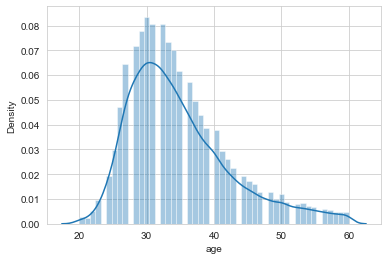

In [176]:
sns.distplot(train['age'])

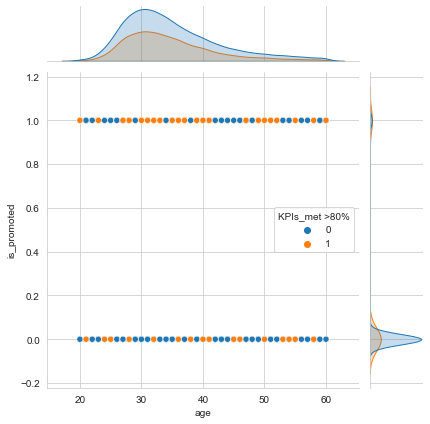

In [179]:
sns.jointplot(x='age',y='is_promoted',data=train,hue="KPIs_met >80%")

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

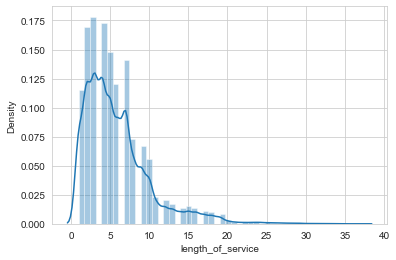

In [180]:
sns.distplot(train['length_of_service'])

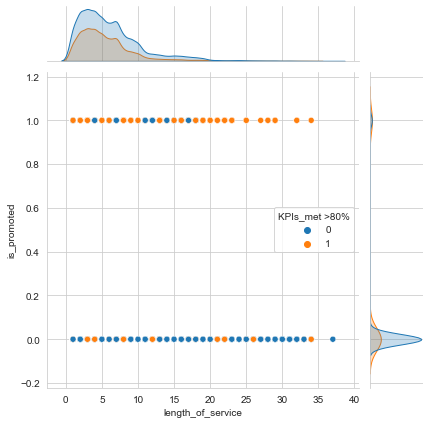

In [183]:
sns.jointplot(x='length_of_service',y='is_promoted',data=train,hue="KPIs_met >80%")

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='Density'>

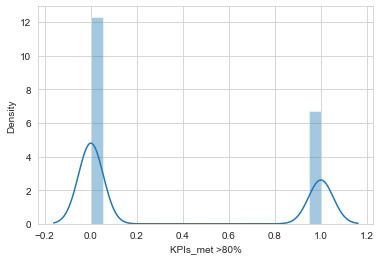

In [185]:
sns.distplot(train['KPIs_met >80%'])

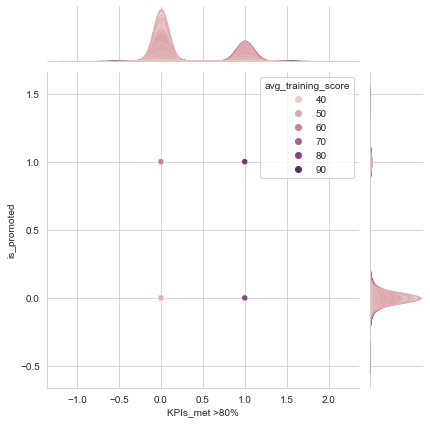

In [192]:
sns.jointplot(x='KPIs_met >80%',y='is_promoted',data=train,hue="avg_training_score")

<AxesSubplot:xlabel='awards_won', ylabel='Density'>

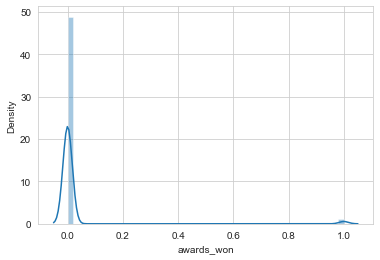

In [214]:
sns.distplot(train['awards_won'])

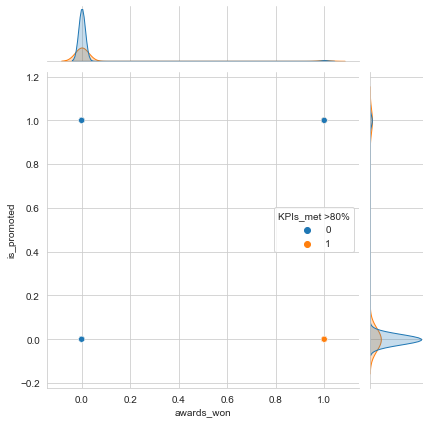

In [215]:
sns.jointplot(x='awards_won',y='is_promoted',data=train,hue="KPIs_met >80%")

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

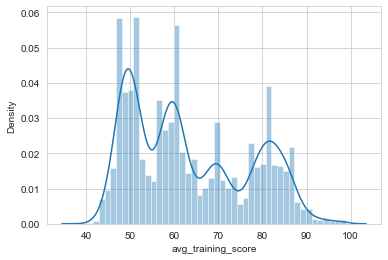

In [216]:
sns.distplot(train['avg_training_score'])

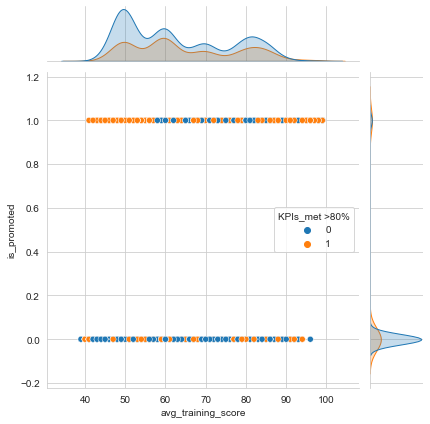

In [220]:
sns.jointplot(x='avg_training_score',y='is_promoted',data=train,hue="KPIs_met >80%")

<AxesSubplot:xlabel='education', ylabel='is_promoted'>

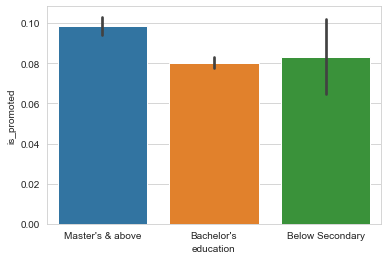

In [226]:
sns.barplot(x="education",y="is_promoted",data=train)

<AxesSubplot:xlabel='education', ylabel='count'>

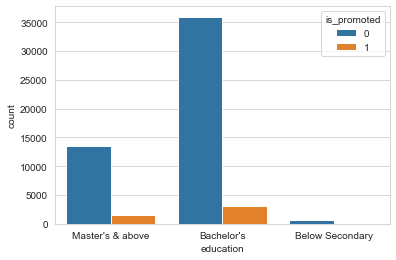

In [233]:
sns.countplot(x="education",hue="is_promoted",data=train)

<AxesSubplot:xlabel='gender', ylabel='is_promoted'>

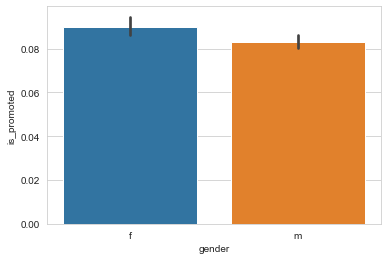

In [230]:
sns.barplot(x="gender",y="is_promoted",data=train)

<AxesSubplot:xlabel='gender', ylabel='count'>

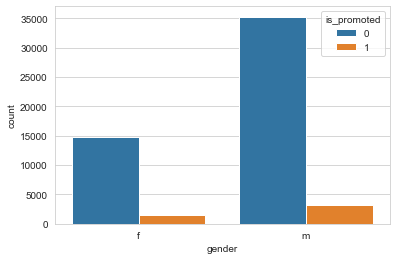

In [231]:
sns.countplot(x="gender",hue="is_promoted",data=train)

<AxesSubplot:xlabel='recruitment_channel', ylabel='is_promoted'>

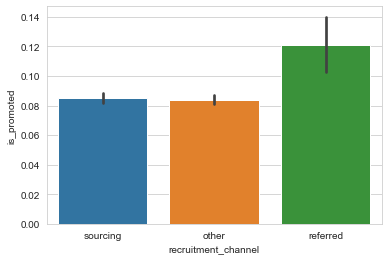

In [234]:
sns.barplot(x="recruitment_channel",y="is_promoted",data=train)

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

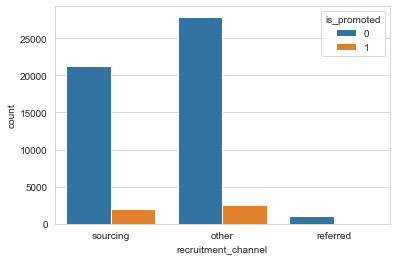

In [239]:
sns.countplot(x="recruitment_channel",hue="is_promoted",data=train)

# Feature Engineering

In [10]:
#making copy to not to loose any original data
main_train=train.copy() 
main_test=test.copy()

In [11]:
#since ml understands integer or flot so started converting them
main_train['region'] = main_train['region'].str.replace('region_',"").astype(int)
main_test['region'] = main_test['region'].str.replace('region_',"").astype(int)

In [12]:
pr=main_train.loc[main_train['is_promoted'] == 1] #just a view to see and how many promoted and from which fiels
pr

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,22,Bachelor's,m,other,1,27,3.0,1,1,1,58,1
67,16502,Sales & Marketing,22,Bachelor's,m,sourcing,1,27,3.0,1,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54734,11685,Operations,15,Bachelor's,m,sourcing,1,31,3.0,1,1,0,56,1
54757,14502,Technology,7,Master's & above,m,other,1,54,4.0,7,0,0,81,1
54761,8278,Procurement,13,Bachelor's,f,sourcing,1,30,4.0,2,1,0,86,1
54792,994,Sales & Marketing,14,Bachelor's,m,other,1,59,3.0,11,0,0,65,1


In [13]:
pr.describe() #too see which is max and aremaining values in an attribute

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,4668.000000,4668.000000,4668.000000,4668.000000,4668.000000,4668.000000,4668.000000,4668.000000,4668.000000,4668.0
mean,39285.092331,13.831191,1.203299,34.372965,3.914524,5.716367,0.698800,0.119751,71.325193,1.0
std,22754.632174,9.736940,0.513805,7.081449,1.045043,4.007772,0.458828,0.324706,14.746122,0.0
min,39.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,41.000000,1.0
25%,19390.500000,4.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,59.000000,1.0
50%,39439.500000,13.000000,1.000000,33.000000,4.000000,5.000000,1.000000,0.000000,71.000000,1.0
75%,59082.250000,22.000000,1.000000,38.000000,5.000000,7.000000,1.000000,0.000000,84.000000,1.0
max,78292.000000,34.000000,6.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.0


### Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

#label encoding to convert categorical to integers and dropping original columns

department_encoder = LabelEncoder() #Sales & Marketing = 7, 'Operations = 4, Technology = 8, Analytics = 0 ,R&D = 6 , Procurement = 5, Finance = 1, HR = 2, Legal = 3.
department_encoder.fit(main_train['department'])
main_train['department_enc'] = department_encoder.transform(main_train['department'])

education_encoder = LabelEncoder() #Bachelor's=0, Below Secondary=1, Master's & above =2
education_encoder.fit(main_train['education'])
main_train['education_enc'] = education_encoder.transform(main_train['education'])

recruitment_channel_encoder = LabelEncoder() #sourcing =2, other=0, #referred=1
recruitment_channel_encoder.fit(main_train['recruitment_channel'])
main_train['recruitment_channel_enc'] = recruitment_channel_encoder.transform(main_train['recruitment_channel'])

gender_encoder = LabelEncoder()
gender_encoder.fit(main_train['gender'])
main_train['gender_enc'] = gender_encoder.transform(main_train['gender']) #f=0, m=1

main_train.drop(['department','education','recruitment_channel','gender'],axis=1 , inplace=True)

## One hot encoding/.........

#gender_encoding = pd.get_dummies(train.gender)
#train=pd.concat([train, gender_encoding], axis=1)

# Outliers

In [15]:
#zscore is one of the way to checks outliers
outliers=[]
def detect_outliers(dataset):
    
    threshold=3
    mean = np.mean(dataset)
    std =np.std(dataset)
    
    
    for i in dataset:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

x=main_train['length_of_service']
print(detect_outliers(x))

[26, 19, 23, 19, 20, 19, 19, 22, 25, 28, 19, 25, 24, 19, 19, 24, 19, 23, 20, 19, 31, 21, 29, 31, 21, 28, 24, 19, 19, 21, 30, 19, 19, 28, 19, 20, 21, 20, 28, 31, 22, 34, 21, 25, 30, 29, 23, 24, 27, 25, 20, 20, 23, 24, 21, 30, 27, 19, 26, 23, 22, 23, 19, 19, 21, 19, 20, 19, 23, 23, 20, 22, 22, 20, 20, 23, 26, 23, 22, 23, 20, 25, 19, 19, 27, 26, 19, 20, 19, 19, 19, 19, 19, 22, 19, 19, 20, 25, 19, 19, 19, 21, 24, 20, 21, 22, 27, 27, 22, 20, 19, 19, 22, 31, 23, 19, 19, 25, 21, 19, 19, 25, 23, 19, 19, 22, 28, 21, 28, 19, 21, 21, 19, 19, 19, 24, 24, 24, 20, 22, 29, 19, 19, 25, 19, 19, 23, 20, 21, 22, 23, 20, 19, 24, 25, 19, 33, 19, 23, 19, 22, 21, 22, 23, 19, 20, 19, 21, 32, 20, 24, 20, 19, 19, 29, 21, 19, 21, 19, 19, 27, 21, 19, 19, 22, 21, 31, 20, 28, 26, 19, 19, 20, 23, 22, 19, 25, 19, 19, 25, 19, 19, 20, 24, 27, 19, 31, 19, 26, 19, 19, 19, 23, 29, 20, 26, 19, 20, 34, 22, 26, 19, 19, 19, 23, 22, 22, 19, 19, 19, 19, 19, 19, 19, 20, 21, 20, 33, 27, 26, 23, 19, 20, 21, 30, 20, 19, 31, 22, 19,

<AxesSubplot:ylabel='no_of_trainings'>

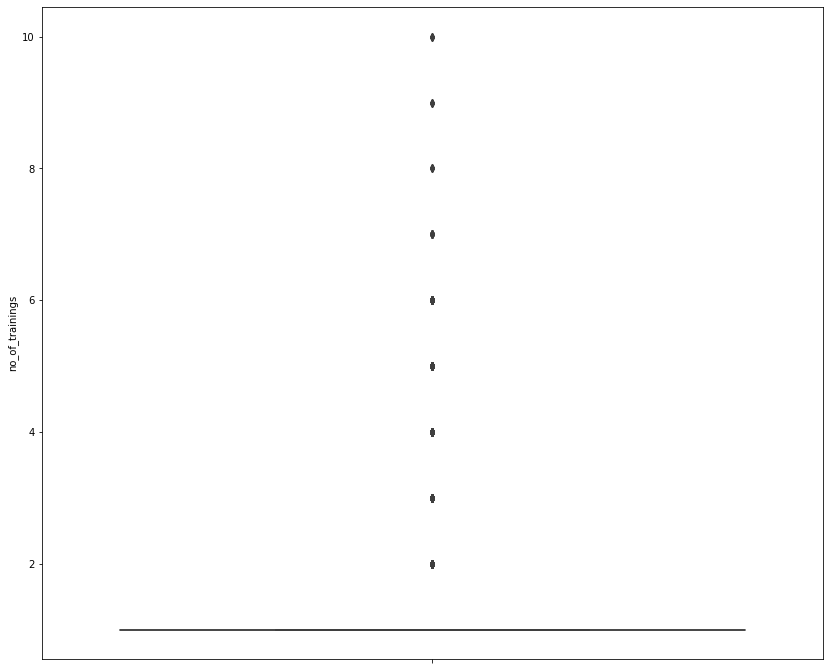

In [16]:
plt.figure(figsize=(14,12))
sns.boxplot(y="no_of_trainings",data=main_train) #boxplot shows outliers

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

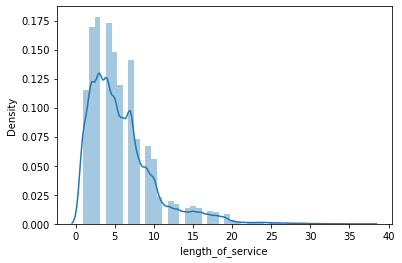

In [17]:
sns.distplot(main_train['length_of_service']) #when i used log the graph is almost similar

# creating new features

In [18]:
def len(main_train):
    if main_train['length_of_service'] <30  and (main_train['avg_training_score'] > 86) :
        return 1
    else:
        return 0
main_train['len'] = main_train.apply(lambda main_train: len(main_train),axis =1 )

In [19]:
def better(main_train):
    if main_train['no_of_trainings']>6 and main_train['length_of_service'] > 25 or main_train['awards_won?'] > 0:
        return 1
    else:
        return 0
main_train['better'] = main_train.apply(lambda main_train: better(main_train), axis=1 )

In [20]:
def dep(main_train):
    if main_train['department_enc'] >= 4  and (main_train['avg_training_score'] > 80):
        return 1
    else:
        return 0
main_train['dep'] = main_train.apply(lambda main_train: dep(main_train),axis =1 )

In [21]:
def performance(main_train):
    if main_train['KPIs_met >80%'] >0 and main_train['awards_won?'] >0 and (main_train['avg_training_score'] > 80):
        return 1
    else:
        return 0
main_train['performance'] = main_train.apply(lambda main_train: performance(main_train),axis =1 )

In [22]:
def pfm(main_train):
    if main_train['KPIs_met >80%']> 1 and main_train['length_of_service'] < 31 or main_train['previous_year_rating'] > 3.0 :
        return 1
    else:
        return 0
main_train['pfm'] = main_train.apply(lambda main_train: pfm(main_train), axis=1 )

In [23]:
#deleted few  2 other features which not helpful

<AxesSubplot:>

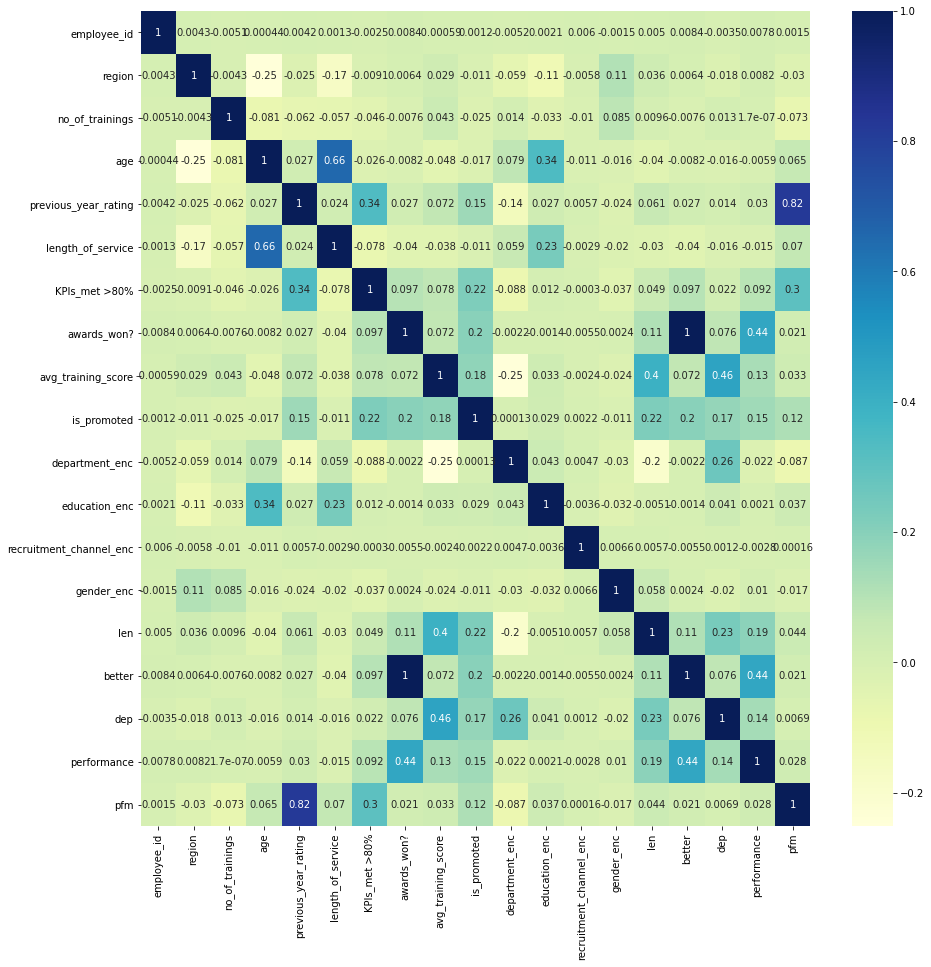

In [24]:
plt.figure(figsize=(15, 15))
sns.heatmap(main_train.corr(), cmap="YlGnBu", annot=True)

# Feature selection

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = main_train.iloc[:,0:20]  #independent columns
y = main_train.iloc[:,9]    #target column i.e is_promoted

In [26]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [27]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [28]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [29]:
featureScores

,Specs,Score
0,employee_id,1037.244033
1,region,47.589009
2,no_of_trainings,10.063491
3,age,27.228103
4,previous_year_rating,574.656810
5,length_of_service,19.351084
6,KPIs_met >80%,1743.827117
7,awards_won?,2054.009313
8,avg_training_score,5072.973743
9,is_promoted,50140.000000


In [30]:
print(featureScores.nlargest(13,'Score'))  #print 10 best features excluding is_promoted bcs its  target column

                   Specs         Score
9            is_promoted  50140.000000
8     avg_training_score   5072.973743
14                   len   2520.661465
7            awards_won?   2054.009313
15                better   2054.009313
6          KPIs_met >80%   1743.827117
16                   dep   1477.713377
17           performance   1156.523440
0            employee_id   1037.244033
4   previous_year_rating    574.656810
18                   pfm    442.973232
11         education_enc     66.356325
1                 region     47.589009


In [31]:
target='is_promoted' #giving target column to variable

In [32]:
X = main_train.loc[:, main_train.columns!=target] #all columns except target column

y = main_train.loc[:, main_train.columns==target] #only target column

display(X)
display(y)

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_enc,education_enc,recruitment_channel_enc,gender_enc,len,better,dep,performance,pfm
0,65438,7,1,35,5.0,8,1,0,49,7,2,2,0,0,0,0,0,1
1,65141,22,1,30,5.0,4,0,0,60,4,0,0,1,0,0,0,0,1
2,7513,19,1,34,3.0,7,0,0,50,7,0,2,1,0,0,0,0,0
3,2542,23,2,39,1.0,10,0,0,50,7,0,0,1,0,0,0,0,0
4,48945,26,1,45,3.0,2,0,0,73,8,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,14,1,48,3.0,17,0,0,78,8,0,2,1,0,0,0,0,0
54804,74592,27,1,37,2.0,6,0,0,56,4,2,0,0,0,0,0,0,0
54805,13918,1,1,27,5.0,3,1,0,79,0,0,0,1,0,0,0,0,1
54806,13614,9,1,29,1.0,2,0,0,45,7,0,2,1,0,0,0,0,0


,is_promoted
0,0
1,0
2,0
3,0
4,0
...,...
54803,0
54804,0
54805,0
54806,0


## splitting

In [33]:
#splitting the data first into two part -- doing a 70:30 split i.e 20% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0 , stratify=y)

In [34]:
main_train.shape,X_train.shape , X_test.shape

((54808, 19), (43846, 18), (10962, 18))

In [35]:
y_train.value_counts() #shows how many 0's and 1's

is_promoted
0              40112
1               3734
dtype: int64

In [36]:
y.value_counts(), y_test.value_counts()

(is_promoted
 0              50140
 1               4668
 dtype: int64,
 is_promoted
 0              10028
 1                934
 dtype: int64)

In [37]:
50140/4668

10.741216795201371

# Smote 
#### Synthetic Minority Oversampling Technique
##  Helpfull for non boosting methods

In [38]:
X = main_train.drop('is_promoted',axis='columns')
y = main_train['is_promoted']

In [39]:
smote = SMOTE(sampling_strategy='minority') #making low sampled data equal to high sampled data
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    50140
1    50140
Name: is_promoted, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [41]:
# Number of classes in training Data
y_train.value_counts()

0    40112
1    40112
Name: is_promoted, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.metrics import roc_auc_score, roc_curve #only f1 :)
from sklearn.model_selection import GridSearchCV # yet to use :(
from sklearn.preprocessing import RobustScaler #usel ful for outliers data

from sklearn.ensemble import RandomForestRegressor # best in non boosting techniques 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0, stratify=y)

In [44]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', RobustScaler()),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [45]:
model_accuracy_scaled(KNeighborsRegressor()) #scaled data is good in knn

0.07469394047843747

In [46]:
model_accuracy_scaled(RandomForestRegressor(random_state=0)) # sme weather scaled or not ::

0.3484650378298366

In [47]:
model_accuracy_unscaled(KNeighborsRegressor())

-0.17160179335120795

In [48]:
model_accuracy_unscaled(RandomForestRegressor(random_state=0))

0.34889948459089704

In [49]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features='auto',n_estimators=125, max_depth = 150,bootstrap=True, random_state = 0) # since boosting giving good results didnt used more parameters

clf.fit(X_train,y_train)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("F1 Score = " ,f1_score(y_test, y_pred))

F1 Score =  0.4662965900079302


In [50]:
print("Precision = " ,precision_score(y_test, y_pred))

Precision =  0.8990825688073395


In [51]:
print("F1 Score = " ,f1_score(y_test, y_pred))

F1 Score =  0.4662965900079302


In [52]:
# libraries
from xgboost import XGBClassifier #importing xgboost classifier
#from sklearn.svm import SVC

In [233]:
xgb = XGBClassifier(scale_pos_weight = 2.59,base_score=0.7,random_state=0,learning_rate=0.09) #few parameters in xgboost

best parameter is scale_pos weight before this subsample gave me very good result but finally scale pos weight acting good for me and learning rate also affects large

In [234]:
xgb.fit(X_train,y_train)

[10:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.09, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.59, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [235]:
y_pred1=xgb.predict(X_test)

In [236]:
print("F1 Score = " ,f1_score(y_test, y_pred1))

F1 Score =  0.5411436541143655


In [57]:
from catboost import CatBoostClassifier # importing cat boost

In [58]:
cat = CatBoostClassifier(learning_rate=0.066,iterations=799, subsample=0.084,max_depth=6,scale_pos_weight=2.401,random_seed=1996,l2_leaf_reg=3, loss_function='Logloss',od_type='Iter',od_wait=1000,verbose=2)


#learning_rate=0.064,iterations=802, subsample=0.086,max_depth=6,scale_pos_weight=2.401,random_seed=1996,l2_leaf_reg=3, loss_function='Logloss',od_type='Iter',od_wait=1000,verbose=2)

#cat = CatBoostClassifier(learning_rate=0.064,n_estimators=520,subsample=0.086,max_depth=6,scale_pos_weight=2.401,random_seed=1996)

#  learning_rate=0.066,iterations=799, subsample=0.084,max_depth=6,scale_pos_weight=2.401,random_seed=1996,l2_leaf_reg=3, loss_function='Logloss',od_type='Iter',od_wait=1000,verbose=2

i got very good results with these parameters 

learning_rate=0.066,iterations=799, subsample=0.084,max_depth=6,scale_pos_weight=2.401,random_seed=1996,l2_leaf_reg=3, loss_function='Logloss',od_type='Iter',od_wait=1000,verbose=2)

in cat boost of 0.516778523489933

In [59]:
cat.fit(X_train,y_train)

0:	learn: 0.6366160	total: 228ms	remaining: 3m 2s
2:	learn: 0.5487470	total: 272ms	remaining: 1m 12s
4:	learn: 0.4714036	total: 319ms	remaining: 50.6s
6:	learn: 0.4405688	total: 372ms	remaining: 42.1s
8:	learn: 0.4045681	total: 428ms	remaining: 37.6s
10:	learn: 0.3834686	total: 475ms	remaining: 34s
12:	learn: 0.3719688	total: 528ms	remaining: 31.9s
14:	learn: 0.3629622	total: 569ms	remaining: 29.7s
16:	learn: 0.3527071	total: 608ms	remaining: 27.9s
18:	learn: 0.3478222	total: 658ms	remaining: 27s
20:	learn: 0.3380267	total: 702ms	remaining: 26s
22:	learn: 0.3320684	total: 754ms	remaining: 25.4s
24:	learn: 0.3271903	total: 803ms	remaining: 24.9s
26:	learn: 0.3250360	total: 857ms	remaining: 24.5s
28:	learn: 0.3222823	total: 909ms	remaining: 24.1s
30:	learn: 0.3191957	total: 953ms	remaining: 23.6s
32:	learn: 0.3179341	total: 1.01s	remaining: 23.4s
34:	learn: 0.3160120	total: 1.06s	remaining: 23.1s
36:	learn: 0.3106133	total: 1.1s	remaining: 22.6s
38:	learn: 0.3086803	total: 1.14s	remainin

324:	learn: 0.2433626	total: 7.97s	remaining: 11.6s
326:	learn: 0.2430551	total: 8.01s	remaining: 11.6s
328:	learn: 0.2429696	total: 8.05s	remaining: 11.5s
330:	learn: 0.2428500	total: 8.1s	remaining: 11.5s
332:	learn: 0.2427390	total: 8.14s	remaining: 11.4s
334:	learn: 0.2425796	total: 8.19s	remaining: 11.3s
336:	learn: 0.2424202	total: 8.24s	remaining: 11.3s
338:	learn: 0.2422782	total: 8.28s	remaining: 11.2s
340:	learn: 0.2421246	total: 8.34s	remaining: 11.2s
342:	learn: 0.2418498	total: 8.4s	remaining: 11.2s
344:	learn: 0.2417724	total: 8.44s	remaining: 11.1s
346:	learn: 0.2416168	total: 8.51s	remaining: 11.1s
348:	learn: 0.2414874	total: 8.55s	remaining: 11s
350:	learn: 0.2412963	total: 8.59s	remaining: 11s
352:	learn: 0.2411580	total: 8.64s	remaining: 10.9s
354:	learn: 0.2410481	total: 8.68s	remaining: 10.9s
356:	learn: 0.2409118	total: 8.72s	remaining: 10.8s
358:	learn: 0.2408108	total: 8.78s	remaining: 10.8s
360:	learn: 0.2404865	total: 8.83s	remaining: 10.7s
362:	learn: 0.2404

642:	learn: 0.2216147	total: 16s	remaining: 3.89s
644:	learn: 0.2215294	total: 16.1s	remaining: 3.84s
646:	learn: 0.2214037	total: 16.1s	remaining: 3.79s
648:	learn: 0.2213009	total: 16.2s	remaining: 3.74s
650:	learn: 0.2211996	total: 16.2s	remaining: 3.69s
652:	learn: 0.2210920	total: 16.3s	remaining: 3.64s
654:	learn: 0.2207412	total: 16.3s	remaining: 3.59s
656:	learn: 0.2206486	total: 16.4s	remaining: 3.54s
658:	learn: 0.2205143	total: 16.4s	remaining: 3.49s
660:	learn: 0.2204372	total: 16.5s	remaining: 3.44s
662:	learn: 0.2203138	total: 16.5s	remaining: 3.39s
664:	learn: 0.2202223	total: 16.6s	remaining: 3.35s
666:	learn: 0.2201157	total: 16.7s	remaining: 3.3s
668:	learn: 0.2200117	total: 16.7s	remaining: 3.25s
670:	learn: 0.2199306	total: 16.8s	remaining: 3.2s
672:	learn: 0.2198762	total: 16.8s	remaining: 3.15s
674:	learn: 0.2197780	total: 16.9s	remaining: 3.1s
676:	learn: 0.2196284	total: 17s	remaining: 3.06s
678:	learn: 0.2195251	total: 17s	remaining: 3.01s
680:	learn: 0.2194381

In [60]:
y_pred2=cat.predict(X_test)

In [61]:
print("F1 Score = " ,f1_score(y_test, y_pred2))

F1 Score =  0.5289256198347109


In [62]:
print('Train Score :',cat.score(X_train,y_train))
print('Test Score :',cat.score(X_test,y_test))

Train Score : 0.9496647356657392
Test Score : 0.9376026272577996


# main_test process

In [63]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  int32  
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int32(1), int64(7), object(4)
memory usage: 2.2+ MB


In [64]:
from sklearn.preprocessing import LabelEncoder # encoding in test data

department_encoder = LabelEncoder() #Sales & Marketing = 7, 'Operations = 4, Technology = 8, Analytics = 0 ,R&D = 6 , Procurement = 5, Finance = 1, HR = 2, Legal = 3.
department_encoder.fit(main_test['department'])
main_test['department_enc'] = department_encoder.transform(main_test['department'])

education_encoder = LabelEncoder() #Bachelor's=0, Below Secondary=1, Master's & above =2
education_encoder.fit(main_test['education'])
main_test['education_enc'] = education_encoder.transform(main_test['education'])

recruitment_channel_encoder = LabelEncoder() #sourcing =2, other=0, #referred=1
recruitment_channel_encoder.fit(main_test['recruitment_channel'])
main_test['recruitment_channel_enc'] = recruitment_channel_encoder.transform(main_test['recruitment_channel'])

gender_encoder = LabelEncoder()
gender_encoder.fit(main_test['gender'])
main_test['gender_enc'] = gender_encoder.transform(main_test['gender']) #f=0, m=1

main_test.drop(['department','education','recruitment_channel','gender'],axis=1 , inplace=True)

## One hot encoding/.........

#gender_encoding = pd.get_dummies(train.gender)
#train=pd.concat([train, gender_encoding], axis=1)

### selecting features

In [65]:
def len(main_test):
    if main_test['length_of_service'] <30  and (main_test['avg_training_score'] > 86) :
        return 1
    else:
        return 0
main_test['len'] = main_test.apply(lambda main_test: len(main_test),axis =1 )

In [66]:
def better(main_test):
    if main_test['no_of_trainings']>6 and main_test['length_of_service'] > 25 or main_test['awards_won?'] > 0:
        return 1
    else:
        return 0
main_test['better'] = main_test.apply(lambda main_test: better(main_test), axis=1 )

In [67]:
def dep(main_test):
    if main_test['department_enc'] >= 4  and (main_test['avg_training_score'] > 80):
        return 1
    else:
        return 0
main_test['dep'] = main_test.apply(lambda main_test: dep(main_test),axis =1 )

In [68]:
def performance(main_test):
    if main_test['KPIs_met >80%'] >0 and main_test['awards_won?'] >0 and (main_test['avg_training_score'] > 80):
        return 1
    else:
        return 0
main_test['performance'] = main_test.apply(lambda main_test: performance(main_test),axis =1 )

In [69]:
def pfm(main_test):
    if main_test['KPIs_met >80%']> 1 and main_test['length_of_service'] < 31 or main_test['previous_year_rating'] > 3.0 :
        return 1
    else:
        return 0
main_test['pfm'] = main_test.apply(lambda main_test: pfm(main_test), axis=1 )

##### making file of xgboost

In [237]:
final_result = xgb.predict(main_test)

Result=pd.DataFrame(final_result)
Submission = pd.DataFrame(columns=['employee_id', 'is_promoted'])
Submission['employee_id'] = main_test['employee_id']
Submission['is_promoted'] = Result.values

Submission.to_csv('result xgb1h.csv', index=False)

#### making file of cat boost

In [71]:
final_result = cat.predict(main_test)

Result=pd.DataFrame(final_result)
Submission = pd.DataFrame(columns=['employee_id', 'is_promoted'])
Submission['employee_id'] = main_test['employee_id']
Submission['is_promoted'] = Result.values

Submission.to_csv('result catb1h.csv', index=False)

#### Catboost is best among all because it gave me best result without using parameters

#### catboost is also a fast algorithm

In [72]:
# from sklearn.ensemble import VotingClassifier #importing voting classifier

In [73]:
#estimator = []

In [74]:
#estimator.append(('CAT',CatBoostClassifier(learning_rate=0.14,n_estimators=496,subsample=0.086,max_depth=6,scale_pos_weight=2.401,random_seed=1996)))
#estimator.append(('XGB',XGBClassifier(scale_pos_weight = 2.59,base_score=0.7)))
#estimator.append(('RFC',RandomForestClassifier(n_estimators=69, max_depth = 30, random_state = 0)))

In [79]:
#vot_soft = VotingClassifier(estimators = estimator,voting ='soft',weights=[25,1])#,2.1
#vot_soft.fit(X_train,y_train)
#y_pred3 = vot_soft.predict(X_test)

In [ ]:
#print("F1 Score = " ,f1_score(y_test, y_pred3))

In [ ]:
#final_result = vot_soft.predict(main_test)

#Result=pd.DataFrame(final_result)
#Submission = pd.DataFrame(columns=['employee_id', 'is_promoted'])
#Submission['employee_id'] = main_test['employee_id']
#Submission['is_promoted'] = Result.values

#Submission.to_csv('result vot_soft3h.csv', index=False)

In [238]:
# just tried voting classifier but didnt got good results

####  highest f1 score from xg boost 0.52020202020202
####  highest f1 score from cat boost 0.516778523489933


All from analytics vidya

## So i choose to use xgboost with highest f1score